# Basic Image Manipulation

1) Accessing and manipulating image pixels (Changing individual pixels)
2) Cropping
3) Resizing
4) Flipping

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

# Manipulating individual pixels

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

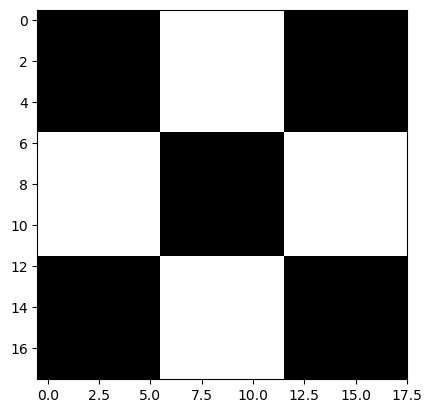

In [4]:
cb_img = cv2.imread("checkerboard_18x18.png", 0)
plt.imshow(cb_img, cmap = 'gray')
print(cb_img)

# Accessing individual pixels
For accessing individual pixels, we use matrix notation which is m[r,c] where r is row and c is column

Numy arrays are zero based.

In [3]:
print(cb_img[0,0]) #Accessing first pixel in top left corner of black box
# Accessing element of 1st row and 1st column
print(cb_img[0,6]) #Accessing first pixel of top white box
# Accessing pixel in 1st row and 7th col

0
255


# Modifying Image Pixels

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

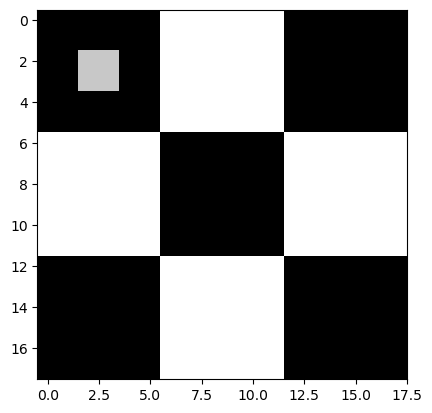

In [7]:
#create copy of image to keep the original image intact
cb_img_copy = cb_img.copy()

cb_img_copy[2:4, 2:4] = 200 #Slicing the matrix from 2nd to 3rd row and 2nd to 3rd col as slicing is exclusive for end index

#cb_img[2,2] = 200; cb_img[2,3] = 200; cb_img[3,2] = 200; cb_img[3,3] = 200

plt.imshow(cb_img_copy, cmap = 'gray')
print(cb_img_copy)

# Cropping Images
Cropping is simply achieved by selecting a specific (pixel) region of the image

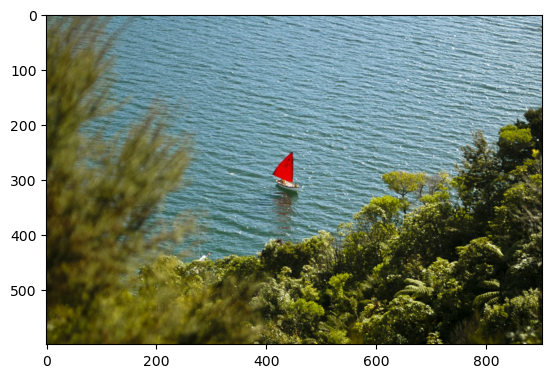

In [8]:
img_bgr = cv2.imread("New_Zealand_Boat.jpg", cv2.IMREAD_COLOR)

img_rgb = img_bgr[:,:,::-1] #cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

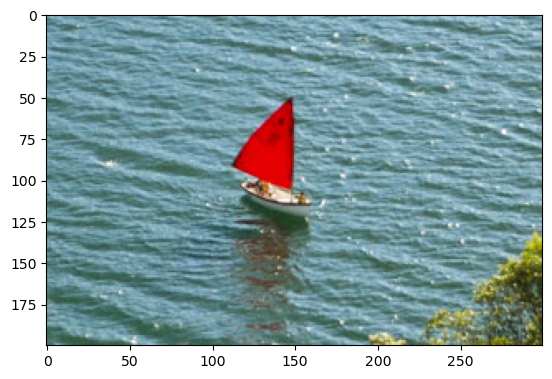

In [12]:
# Crop out middle region of Image
# Achieve cropping by indexing the original image

cropped_region = img_bgr[200:400, 300:600, :]
#cropped_region = img_bgr[200:400, 300:600]

plt.imshow(cropped_region[:, :, ::-1])

# Resizing Images

The function resize resizes the image src down to or up to specified size.

Function syntax:
dst = cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])

dst is the output image whose size would be equal to dsize when its non zero otherwise given by src.size(), fx and fy. Type is same is src.

2 required arguments:

src: input image

dsize: output image size

optional: 

fx=> scale factor along horizontal axis, when 0 given by dsize.width/src.cols

fy=> scale factor along vertical axis, when 0 given by dsize.height/src.rows

Interpolation: example- When resizing up, we indent new pixels using interpolation


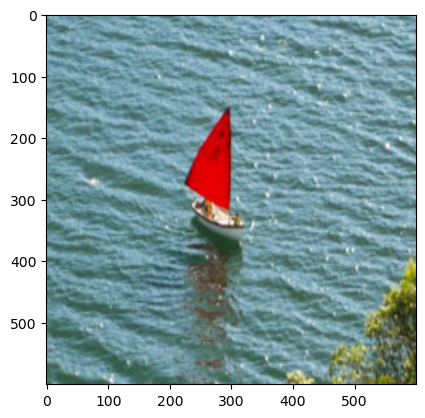

In [17]:
# Method 1: Specifying scale factors fx and fy

resized_cropped_region_1 = cv2.resize(cropped_region, None, fx = 2, fy = 3)
# dsize is a required argument so we set it over here to None
# doubles width and triples the height

plt.imshow(resized_cropped_region_1[:,:,::-1])

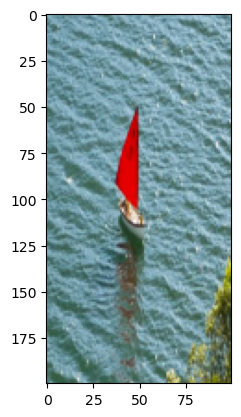

In [20]:
# Method 2: Specifying exact size of output image

desired_width = 100
desired_height = 200

dim = (desired_width, desired_height) #creating a 2D vector containing desired dimensions
resized_cropped_region_2 = cv2.resize(cropped_region, dim, interpolation = cv2.INTER_AREA)

plt.imshow(resized_cropped_region_2[:,:,::-1])
# Image is distorted as we didn't maintain the original aspect ratio

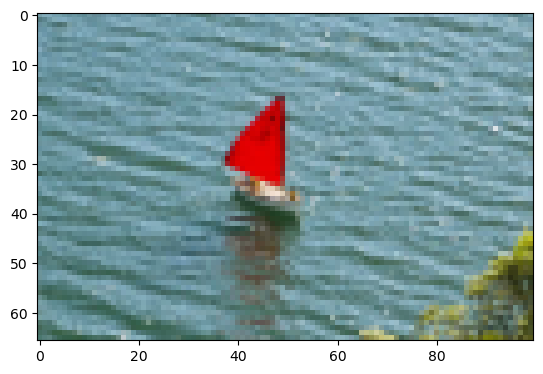

In [22]:
# Method 3: Resize while maintaining the aspect ratio

desired_width = 100
aspect_ratio = desired_width/cropped_region.shape[1]     # divided by the number of cols of original

desired_height = int(aspect_ratio * cropped_region.shape[0])
# calculate the height while maintaining the ratio

dim = (desired_width, desired_height)

resized_cropped_region_3 = cv2.resize(cropped_region, dim, interpolation = cv2.INTER_AREA)

plt.imshow(resized_cropped_region_3[:,:,::-1])

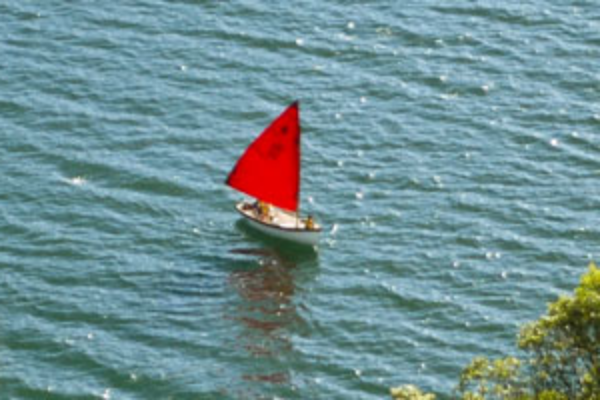

In [23]:
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx = 2, fy = 2)

cv2.imwrite("resized_cropped_2x.png", resized_cropped_region_2x);
Image(filename = "resized_cropped_2x.png")

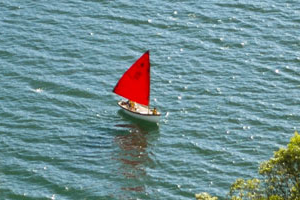

In [25]:
cv2.imwrite("cropped.png", cropped_region);
Image(filename = "cropped.png")

#On displaying, we can see one image is twice of other